In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':15})

In [75]:
f = open("LNP_graphing_data.pickle","rb")
z_ints2,e_ints1,m_ints1 = pickle.load(f,encoding='latin1')
f.close()

# plot delay and gain

- e_ints1: emg data
- m_ints1: manual data

first axis is [visual gain, visual delay, feedback gain, feedback delay]

second axis is [5th, 9th percentile]

In [76]:
# rearrange data to ([manual and emg] x [5th, 50th, 95th percentile])
vis_delay = np.vstack([[m_ints1[1][0],np.mean(m_ints1[1]),m_ints1[1][1]],
                       [e_ints1[1][0],np.mean(e_ints1[1]),e_ints1[1][1]]]) 
vis_gain = np.vstack([[m_ints1[0][0],np.mean(m_ints1[0]),m_ints1[0][1]],
                       [e_ints1[0][0],np.mean(e_ints1[0]),e_ints1[0][1]]]) 
fb_delay = np.vstack([[m_ints1[3][0],np.mean(m_ints1[3]),m_ints1[3][1]],
                       [e_ints1[3][0],np.mean(e_ints1[3]),e_ints1[3][1]]]) 
fb_gain = np.vstack([[m_ints1[2][0],np.mean(m_ints1[2]),m_ints1[2][1]],
                       [e_ints1[2][0],np.mean(e_ints1[2]),e_ints1[2][1]]]) 

In [77]:
np.hstack([vis_delay[:,1]-vis_delay[:,0],fb_delay[:,1]-fb_delay[:,0]])

array([0.00278842, 0.00269055, 0.00580369, 0.00274113])

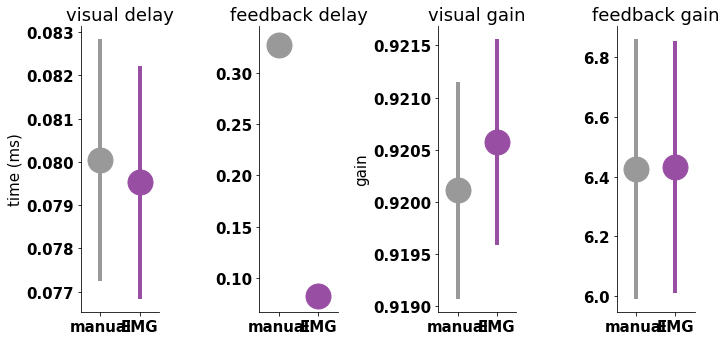

In [88]:
# PLOT DELAY
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
titles=['visual delay','feedback delay','visual gain', 'feedback gain']
yaxis = ['time (ms)','time (ms)','gain','gain']
data = [vis_delay,fb_delay,vis_gain,fb_gain]
xx = np.arange(1,3,1)
# plt.errorbar(xx,np.hstack([vis_delay[:,1],fb_delay[:,1]]),
#              np.hstack([vis_delay[:,1]-vis_delay[:,0],fb_delay[:,1]-fb_delay[:,0]]), 
#              linestyle='None', marker='^')
fig,axs = plt.subplots(1,4,sharex=True,sharey=False,figsize=(10,5))
plt.setp(axs, xticks=[1,2], xticklabels=['manual','EMG'])
plt.xlim((0.5,2.5))
# plot visual delay
for ix,ax in enumerate(axs):
    ax.errorbar(xx[0],data[ix][:,1][0],yerr=data[ix][:,1][0]-data[ix][:,0][0], 
                 fmt='o',markersize=25,linewidth=4,color=CB_color_cycle[6])
    ax.errorbar(xx[1],data[ix][:,1][1],yerr=data[ix][:,1][1]-data[ix][:,0][1], 
                 fmt='o',markersize=25,linewidth=4,color=CB_color_cycle[5])
    ax.set_title(titles[ix])
    if ix == 0 or ix == 2:
        ax.set_ylabel(yaxis[ix])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.tight_layout()

In [21]:
np.asarray(e_ints1).shape

(4, 2)

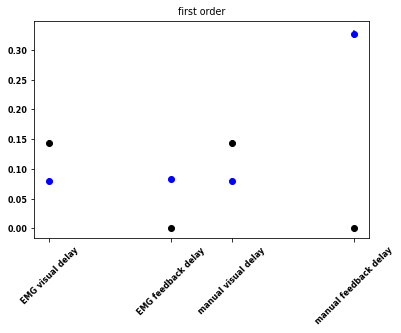

In [13]:
z_ints1 = [[0.37, 0.40], [.181, .211], [2.5, 2.8], [.141, .183]]
z_ints2 = [[0.39, 0.42], [.141, .147], [2.5, 2.8], [0, 0]]

font = {'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

for idx in [1, 3]:
    plt.plot([idx, idx], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx, idx], [e_ints1[idx][0], e_ints1[idx][1]], color='b')
    plt.plot(idx, np.mean(e_ints1[idx]), 'o', color='b')
    
for idx in [1, 3]:
    plt.plot([idx+3,idx+3], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx+3, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx+3, idx+3], [m_ints1[idx][0], m_ints1[idx][1]], color='b')
    plt.plot(idx+3, np.mean(m_ints1[idx]), 'o', color='b')  
    
plt.title("first order")
plt.xticks([1, 3, 4, 6], ['EMG visual delay', 'EMG feedback delay','manual visual delay','manual feedback delay'])
plt.xticks(rotation = 45)
plt.show()

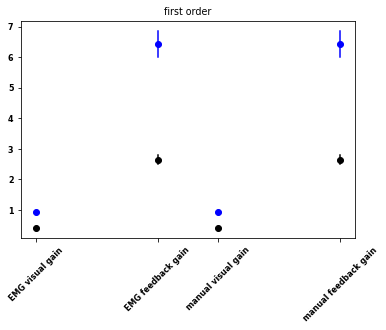

In [14]:
font = {'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

for idx in [0, 2]:
    plt.plot([idx, idx], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx, idx], [e_ints1[idx][0], e_ints1[idx][1]], color='b')
    plt.plot(idx, np.mean(e_ints1[idx]), 'o', color='b')
    
for idx in [0, 2]:
    plt.plot([idx+3,idx+3], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx+3, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx+3, idx+3], [m_ints1[idx][0], m_ints1[idx][1]], color='b')
    plt.plot(idx+3, np.mean(m_ints1[idx]), 'o', color='b')  
    
plt.title("first order")
plt.xticks([0, 2, 3, 5], ['EMG visual gain', 'EMG feedback gain','manual visual gain','manual feedback gain'])
plt.xticks(rotation = 45)
plt.show()